# Feature Engineering (FE) & EDA for Credit Card Fraud Detection
Author: Shanrong Zhou

Every year billions of dollars are lost in the US due to credit card fraud. Thus, forcing financial institutions to continuously improve their fraud detection systems. In recent years, machine learning and data mining techniques are being used to address this problem. When constructing a credit card fraud detection model, it is very important to extract the right features from the transactional data.
- Objectives: This report uses a real dataset to conduct the Exploratory Data Analysis (EDA) and Feature Engineering (FE) process for credit card fraud detection. The main objective is to create some useful features, that can capture the consumer spending patterns and detect the anomalities. With the anomalities detected, we can further investigate the specific transactions and make potential fraud alerts. 
- Dataset: The dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions in the State of Oklahoma. 

# Table of Contents
- [Section 1 Data Preparation](#1)
  - [1.1 Create Data Fields](#11)
- [Section 2 Exploratory Data Analysis](#2)
- [Section 3 Feature Engineering](#3)
  - [3.1 Grouping by agency, merchant category and month](#31)
      - [3.1.1 Feature 1: The ratio to average amount (grouping by agency, merchant category and month)](#311)
      - [3.1.2 Feature 2: The ratio to median amount (grouping by agency, merchant category and month)](#312)
  - [3.2 Grouping by agency, merchant category and day of week](#32)
      - [3.2.1 Feature 3: The ratio to average amount (grouping by agency, merchant category and day of week)](#321)
      - [3.2.2 Feature 4: The ratio to median amount (grouping by agency, merchant category and day of week)](#322)
  - [3.3 Grouping by agency, description and month](#33)
      - [3.3.1 Feature 5: The ratio to average amount (grouping by agency, description and month)](#331)
      - [3.3.2 Feature 6: The ratio to median amount (grouping by agency, description and month)](#332)
  - [3.4 Grouping by agency, description and day of week](#34)
      - [3.4.1 Feature 7: The ratio to average amount (grouping by agency, description and day of week )](#341)
      - [3.4.2 Feature 8: The ratio to median amount (grouping by agency, description and day of week)](#342)
  - [3.5 Grouping by agency, vendor and month](#35)
      - [3.5.1 Feature 9: The ratio to average amount (grouping by agency, vendor and month)](#351)
      - [3.5.2 Feature 10: The ratio to median amount (grouping by agency, vendor and month)](#352)
  - [3.6 Grouping by agency, vendor and day of week](#36)
      - [3.6.1 Feature 11: The ratio to average amount (grouping by agency, vendor and day of week)](#361)
      - [3.6.2 Feature 12: The ratio to median amount (grouping by agency, vendor and day of week)](#362)
  - [3.7 Grouping by agency, merchant category and description](#37)
      - [3.7.1 Feature 13: The ratio to average amount (grouping by agency, merchant category and description)](#371)
      - [3.7.2 Feature 14: The ratio to median amount (grouping by agency, merchant category and description)](#372)
  - [3.8 Grouping by agency, merchant category and vendor](#38)
      - [3.8.1 Feature 15: The ratio to average amount (grouping by agency, merchant category and vendor)](#381)
      - [3.8.2 Feature 16: The ratio to median amount (grouping by agency, merchant category and vendor)](#382)
- [Section 4 Conclusion](#4)
  - [4.1 Combine New Features to Dataset](#41)
  - [4.2 Future Improvements](#42)



## Section 1 Data Preparation <a class="anchor" id="1"></a>

Basic business understandings of the raw data:
- Each row is a transaction of a cardholder (last name + first name).
- An agency can have multiple cardholders. A corporate card (agency_name) can be used by many cardholders and these cardholders have to follow the corporation policy.
- An agency and its cardholders can spend on various merchant categories, vendors and uses/transaction types (description). 

In [1]:
import pandas as pd
path = '/Users/alicezhou/Documents/Columbia/5420 Anomaly Detection/2. Exploratory Data Analysis (EDA)_Industry Case - Credit card Transaction Data/Assignment2/' 
df = pd.read_csv(path + 'purchase_credit_card.csv') 
df.head(5)  

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [2]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns 
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


In [3]:
# change column names 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

###  1.1 Create date fields <a class="anchor" id="11"></a>

In [4]:
#Creating separate Year and Month columns for future feature engineering
#Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

In [5]:
print(df.columns)

Index(['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
       'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor',
       'Transaction_Date', 'Posted_Date', 'Merchant_Category', 'Year', 'Month',
       'Week_Number', 'Day_of_Week'],
      dtype='object')


## Section 2 Exploratory Data Analysis <a class="anchor" id="2"></a>

In [6]:
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Summarizing the number of transactions among agencies, as shown below, we can see University of OKLAHOMA has the most transactions, followed by Univ. of Okla health science center.

<AxesSubplot:xlabel='Count', ylabel='Agency_Name'>

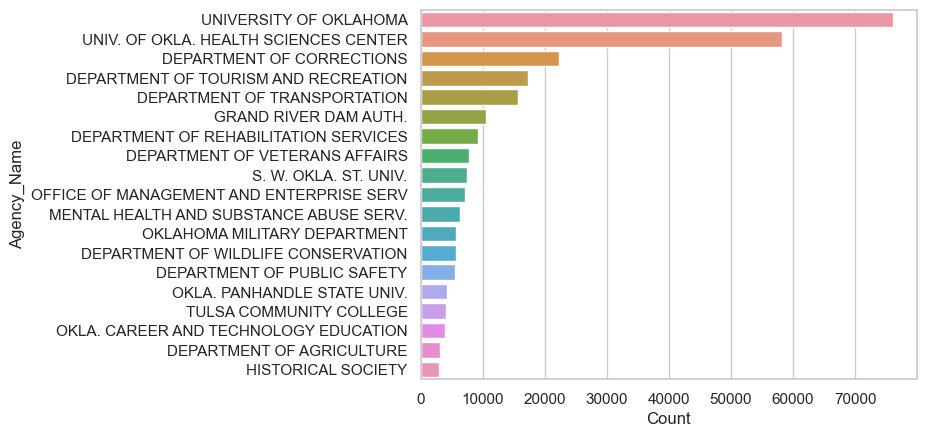

In [7]:
# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name','Count']
# Bar chart for comparing number of transactions among agencies
fig = px.bar(df_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=1000, height=400)
sns.set_theme(style="whitegrid")
sns.barplot(y="Agency_Name", x="Count", data=df_count[1:20])

Summarizing the number of transactions among uses, as shown below, we can see people has the most transactions on air travel, followed by room charges. It makes sense since these credit cards are corporate cards, which should support employees' business trips' expenses.

<AxesSubplot:xlabel='Count', ylabel='Description'>

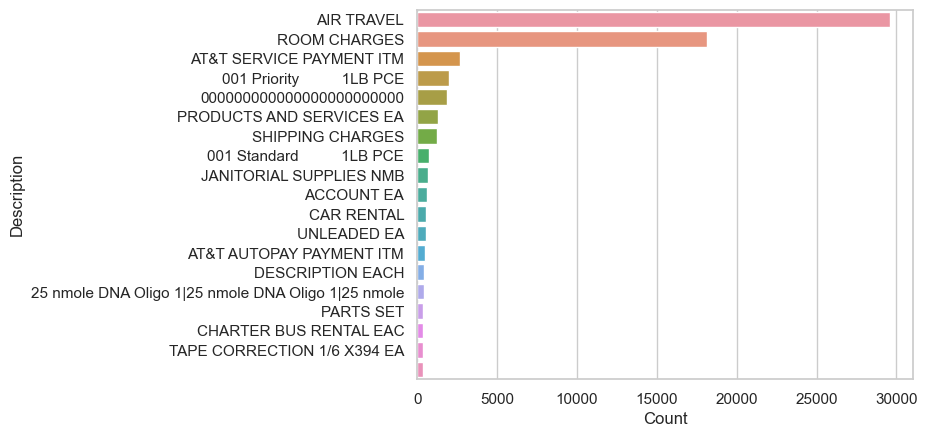

In [8]:
# Summarize the count statistics by description in df_count
df_count = df['Description'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Description','Count']
# Bar chart for comparing number of transactions among uses/transaction types (descriptions)
fig = px.bar(df_count, x='Description', y='Count', color = 'Description', width=1000, height=400)
sns.set_theme(style="whitegrid")
sns.barplot(y="Description", x="Count", data=df_count[1:20])

Summarizing the number of transactions among months and days of week separately, as shown below, we can see people has the least transactions in December compared to the other months, and the least transactions on Sunday compared to the other days of week. It also makes sense since December is the holiday season of year, and Sunday is the day off in a week. People are supposed to have less business activities during these days. 

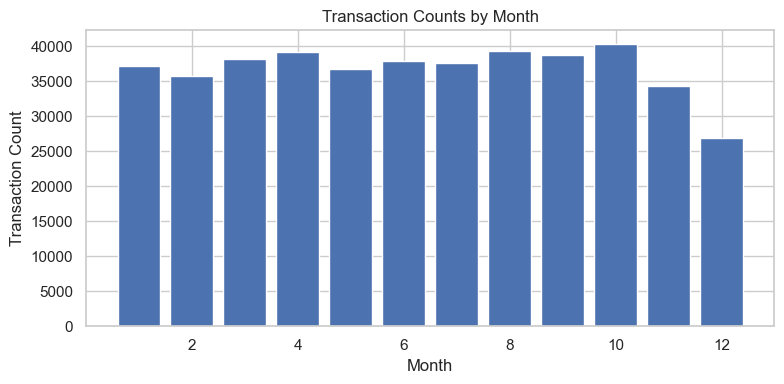

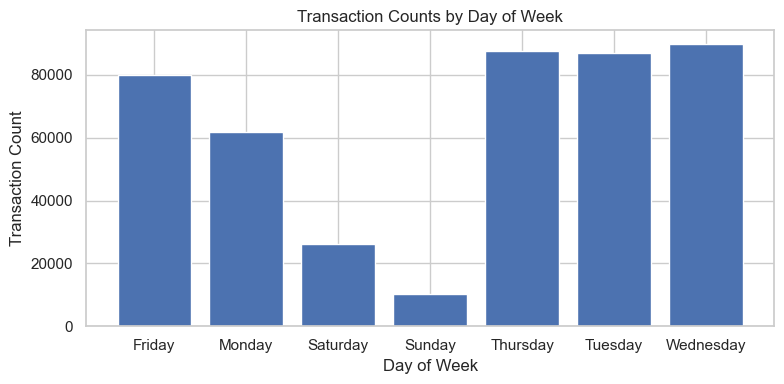

In [9]:
# Summarize the count statistics by month in summary_month, and by day of week in summary_day
summary_month = df.groupby(['Month']).size().reset_index(name='Transaction_Count')
summary_day = df.groupby(['Day_of_Week']).size().reset_index(name='Transaction_Count')

# Bar chart for comparing number of transactions among months
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(summary_month['Month'], summary_month['Transaction_Count'])
ax.set_xlabel('Month')
ax.set_ylabel('Transaction Count')
ax.set_title('Transaction Counts by Month')
plt.tight_layout()
plt.show()

# Bar chart for comparing number of transactions among days of week:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(summary_day['Day_of_Week'], summary_day['Transaction_Count'])
ax.set_xlabel('Day of Week')
ax.set_ylabel('Transaction Count')
ax.set_title('Transaction Counts by Day of Week')
plt.tight_layout()
plt.show()

By summarizing the number of transactions among merchant categories and vendors separately, as shown below, we can see that book stores (among all the merchant categories) and Amazon (among all the vendors) takes the most transactions. It can be related to the credit card's educational purpose. However, we can not simply conclude anomalies from here, since a agency can spend on various merchant categories and vendors. We can  group the transactions based on agency and one of the other features, for further anomaly detection.

<AxesSubplot:xlabel='Count', ylabel='Merchant_Category'>

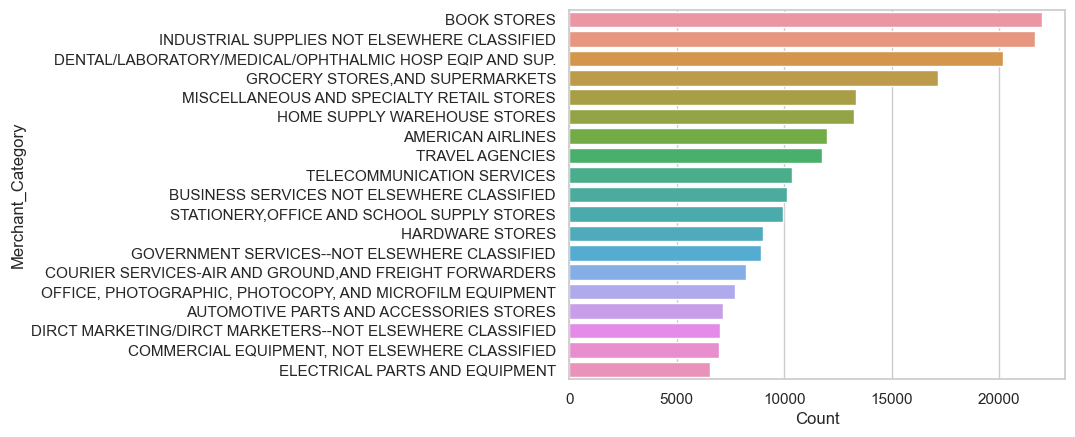

In [10]:
# Summarize the count statistics by merchant category in df_count
df_count = df['Merchant_Category'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Merchant_Category','Count']
# Bar chart for comparing number of transactions among merchant categories
fig = px.bar(df_count, x='Merchant_Category', y='Count', color = 'Merchant_Category', width=1000, height=400)
sns.set_theme(style="whitegrid")
sns.barplot(y="Merchant_Category", x="Count", data=df_count[1:20])

<AxesSubplot:xlabel='Count', ylabel='Vendor'>

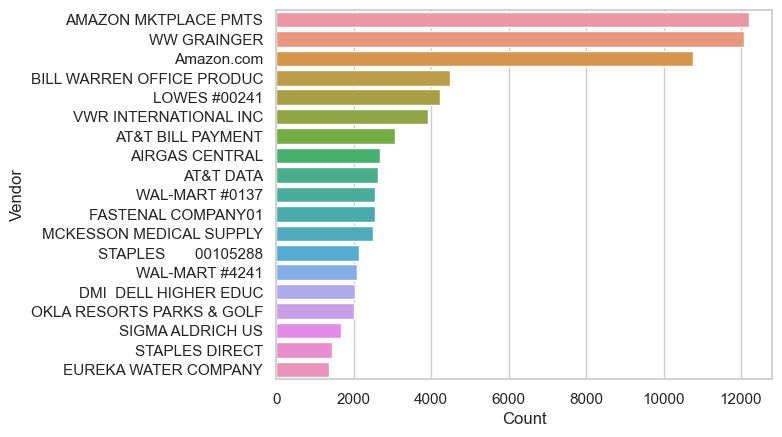

In [11]:
# Summarize the count statistics by vendor in df_count
df_count = df['Vendor'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Vendor','Count']
# Bar chart for comparing number of transactions among vendors
fig = px.bar(df_count, x='Vendor', y='Count', color = 'Vendor', width=1000, height=400)
sns.set_theme(style="whitegrid")
sns.barplot(y="Vendor", x="Count", data=df_count[1:20])

## Section 3 Feature Engineering <a class="anchor" id="3"></a>
Based on the business understandings and exploratory data analysis stated above, I decided to start the feature engineering process with Transaction Aggregation Strategy, which is grouping the transactions made during the Fiscal Year 2014:
- first by agency name and card holder name level 
- then by different combinations of merchant category, vendor, description, and time
- followed by calculating the total amount spent on those transactions

After the transaction aggregation, I will then calculate the average or median amount as the benchmark for single transaction comparison. By selecting the transactions that deviated a lot from the benchmark, we can define them as anomalies for further investigation. For practical use, the credit card company may need to contact the card holder or the agency, in order to investigate weather the card holder has abused the corporate card, or the card information was stolen by other people. 

###  3.1 Grouping by agency, merchant category and month <a class="anchor" id="31"></a>
The first aggregation method is to investigate the consumer spending pattern in the same merchant category, and within the same month. It is expected that people within the same organization should spend a certain range of amount in the same merchant category, and within the same month. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.1.1 Feature 1: The ratio to average amount (grouping by agency, merchant category and month) <a class="anchor" id="311"></a>
The average spending amount is used as benchmark for anomaly detection.

In [12]:
# create average spending group by agency, merchant category and month
stat1 = df.groupby(['Agency_Name', 'Merchant_Category','Month'])['Amount'].mean()
stat1 = pd.DataFrame(stat1)
stat1.columns = ['AVG_amount']
stat1

AVG_amount
Agency_Name                     Merchant_Category                          Month            
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11     115.120000
                                CATALOG MERCHANTS                          7     -637.750000
                                                                           8      669.080000
                                                                           9     -334.540000
                                                                           10     334.540000
...                                                                                      ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9      260.450000
                                                                           10     523.800000
                                                                           12     199.633333
                                WYNDHAM HOTELS                             1        0.000000
                                                                           12     130.596000

[39888 rows x 1 columns]

In [13]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat1, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
# Feature 1: ratio of amount spending and avergae spending by merchant category and month 
df1['agency_merchant_month_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_month_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.993083e-01
std      5.961952e+13
min     -2.447706e+16
25%      2.017647e-01
50%      5.984763e-01
75%      1.125213e+00
max      3.059633e+16
Name: agency_merchant_month_avg_ratio_amount, dtype: float64

To better look at the distribution of transactions' ratios of amount spending and avergae spending by merchant category and month, I cut them into different groups by percentile, and then use a histogram to visualize the distribution. 

In [14]:
# cut by percentile for plotting
var = 'agency_merchant_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var],percentile)
df1[['agency_merchant_month_avg_ratio_amount']]

,agency_merchant_month_avg_ratio_amount
0,1.840868
1,1.015535
2,0.422770
3,1.784624
4,0.488447
...,...
442453,0.393759
442454,0.528511
442455,0.037893
442456,9.393887


[Text(0, 0, '(-2.4477063974758644e+16, -0.734]'),
 Text(1, 0, '(-0.734, 0.0239]'),
 Text(2, 0, '(0.0239, 0.151]'),
 Text(3, 0, '(0.151, 0.598]'),
 Text(4, 0, '(0.598, 1.34]'),
 Text(5, 0, '(1.34, 3.417]'),
 Text(6, 0, '(3.417, 8.05]'),
 Text(7, 0, '(8.05, 3.0596329968448308e+16]')]

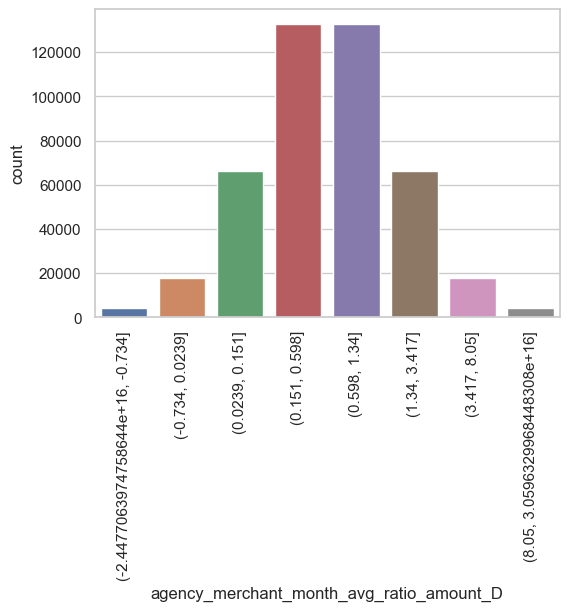

In [15]:
# Histogram for comparing ratio of amount spending and avergae spending by merchant category and month 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_month_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the average. 
- From the above distribution histogram, we can see that some transactions can be more than 3 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 15% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies. 
- Lastly, there are some transactions with negavtive amount, and their absolute amount can be more than 2 times of the average. It can be normal returns or refunds from vendors. However, it can also be alerts for Anti Money Laundering (AML) purpose of financing companies.

In [16]:
df1[df1['agency_merchant_month_avg_ratio_amount']>3].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,10.289417,"(8.05, 3.0596329968448308e+16]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,568.982548,6.295448,"(3.417, 8.05]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,497.214194,7.712974,"(3.417, 8.05]"
60,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,525.0,CARE COMMUNICATIONS,2013-07-25,2013-07-26,TELECOMMUNICATION SERVICES,2013,7,30,Thursday,89.090918,5.892857,"(3.417, 8.05]"


In [17]:
df1[df1['agency_merchant_month_avg_ratio_amount']<-2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_avg_ratio_amount_D
148,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Flock,S,WTRFALL PUMP EA|WTRFALL PUMP EA,-258.00,THE HOME DEPOT 3904,2013-07-26,2013-07-29,HOME SUPPLY WAREHOUSE STORES,2013,7,30,Friday,99.052165,-2.604688,"(-2.4477063974758644e+16, -0.734]"
356,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,-2474.99,CDW GOVERNMENT,2013-07-26,2013-07-29,CATALOG MERCHANTS,2013,7,30,Friday,450.829655,-5.489856,"(-2.4477063974758644e+16, -0.734]"
1049,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Bowers,R,GENERAL PURCHASE,-638.82,LOWES #00241,2013-07-26,2013-07-29,HOME SUPPLY WAREHOUSE STORES,2013,7,30,Friday,99.052165,-6.449329,"(-2.4477063974758644e+16, -0.734]"
1374,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,KELOUGH,N,GENERAL PURCHASE,-1812.78,LOCKE SUPPLY OKMULGEE,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,235.679053,-7.691732,"(-2.4477063974758644e+16, -0.734]"
1510,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Tornakian,M,JANITORIAL SUPPLIES NMB,-875.84,"GRIMSLEY'S, INC.",2013-07-02,2013-07-04,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,27,Tuesday,290.626589,-3.013627,"(-2.4477063974758644e+16, -0.734]"


####  3.1.2 Feature 2: The ratio to median amount (grouping by agency, merchant category and month) <a class="anchor" id="312"></a>
The median spending amount is used as benchmark for anomaly detection.

In [18]:
# create median spending group by agency, merchant category and month
stat2 = df.groupby(['Agency_Name', 'Merchant_Category','Month'])['Amount'].median()
stat2 = pd.DataFrame(stat2)
stat2.columns = ['Median_amount']
stat2

Median_amount
Agency_Name                     Merchant_Category                          Month               
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11            115.12
                                CATALOG MERCHANTS                          7            -637.75
                                                                           8             669.08
                                                                           9            -334.54
                                                                           10            334.54
...                                                                                         ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9             510.60
                                                                           10            523.80
                                                                           12            181.80
                                WYNDHAM HOTELS                             1               0.00
                                                                           12             87.00

[39888 rows x 1 columns]

In [19]:
# add the new feature average spending to the dataset 
df2 = pd.merge(df, stat2, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
# Feature 2: ratio of amount spending and median spending by merchant category and month 
df2['agency_merchant_month_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_month_median_ratio_amount'].describe()

count    442458.000000
mean          5.010047
std        1195.766096
min      -29642.000000
25%           0.500000
50%           1.000000
75%           1.912717
max      598420.505983
Name: agency_merchant_month_median_ratio_amount, dtype: float64

To better look at the distribution of transactions' ratios of amount spending and median spending by merchant category and month, I cut them into different groups by percentile, and then use a histogram to visualize the distribution.

In [20]:
# cut by percentile for plotting
var = 'agency_merchant_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)
df2[['agency_merchant_month_median_ratio_amount']]

,agency_merchant_month_median_ratio_amount
0,2.438356
1,0.853600
2,0.874301
3,3.149485
4,1.172266
...,...
442453,1.169122
442454,5.887946
442455,0.490813
442456,44.640512


[Text(0, 0, '(-29642.001, -1.103]'),
 Text(1, 0, '(-1.103, 0.0687]'),
 Text(2, 0, '(0.0687, 0.389]'),
 Text(3, 0, '(0.389, 1.0]'),
 Text(4, 0, '(1.0, 2.425]'),
 Text(5, 0, '(2.425, 8.71]'),
 Text(6, 0, '(8.71, 27.182]'),
 Text(7, 0, '(27.182, 598420.506]')]

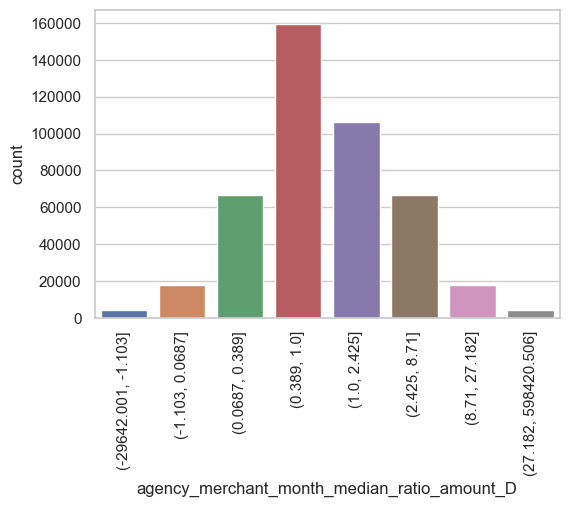

In [21]:
# Histogram for comparing ratio of amount spending and median spending by merchant category and month 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_month_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the median. 
- Similarly, from the above distribution histogram, we can see that some transactions can be more than 8 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [22]:
df2[df2['agency_merchant_month_median_ratio_amount']>8].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_month_median_ratio_amount,agency_merchant_month_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,60.535,40.059470,"(27.182, 598420.506]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,60.535,40.059470,"(27.182, 598420.506]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,198.500,18.045340,"(8.71, 27.182]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,210.000,18.261905,"(8.71, 27.182]"
60,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,525.0,CARE COMMUNICATIONS,2013-07-25,2013-07-26,TELECOMMUNICATION SERVICES,2013,7,30,Thursday,30.865,17.009558,"(8.71, 27.182]"


I am also very interested about the transaction whose amount is less than -20,000 times than the median. However, when I extract this transaction and look into detail, I discovered the amount of this transaction is just $296. The reason for the high ratio is the low value of the median of a certain group of transactions. This transaction is a normal case. It can be the reason of some exaggerated extreme case (eg. the ratio larger than 598,000).

In [23]:
df2[df2['agency_merchant_month_median_ratio_amount']<-20000].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_month_median_ratio_amount,agency_merchant_month_median_ratio_amount_D
383145,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Brienen,R,ROOM CHARGES,296.42,COURTYARD BY MARRIOTT BOS,2014-06-06,2014-06-09,COURTYARD BY MARRIOTT,2014,6,23,Friday,-0.01,-29642.0,"(-29642.001, -1.103]"


###  3.2 Grouping by agency, merchant category and day of week <a class="anchor" id="32"></a>
The second aggregation method is to investigate the consumer spending pattern in the same merchant category, and within the same day of week. It is expected that people within the same organization should spend a certain range of amount in the same merchant category, and within the same day of week. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.2.1 Feature 3: The ratio to average amount (grouping by agency, merchant category and day of week) <a class="anchor" id="321"></a>
The average spending amount is used as benchmark for anomaly detection.

In [24]:
# create average spending group by agency, merchant category and day of week
stat3 = df.groupby(['Agency_Name', 'Merchant_Category','Day_of_Week'])['Amount'].mean()
stat3 = pd.DataFrame(stat3)
stat3.columns = ['AVG_amount']
stat3

AVG_amount
Agency_Name                     Merchant_Category                          Day_of_Week            
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED Friday       115.120000
                                CATALOG MERCHANTS                          Friday        31.330000
                                                                           Monday       334.540000
                                                                           Thursday    -269.590000
                                                                           Wednesday     38.160000
...                                                                                            ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            Thursday     331.466667
                                                                           Tuesday     -283.500000
                                                                           Wednesday    352.800000
                                WYNDHAM HOTELS                             Thursday      87.000000
                                                                           Tuesday      101.660000

[27574 rows x 1 columns]

In [25]:
# add the new feature average spending to the dataset 
df3 = pd.merge(df, stat3, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 1: ratio of amount spending and avergae spending by merchant category and day of week 
df3['agency_merchant_day_avg_ratio_amount'] = np.where(df3['AVG_amount']==0,0, df3['Amount'] / df3['AVG_amount'])
df3['agency_merchant_day_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.986634e-01
std      3.091416e+15
min     -5.875565e+17
25%      1.938586e-01
50%      5.725592e-01
75%      1.115607e+00
max      5.875565e+17
Name: agency_merchant_day_avg_ratio_amount, dtype: float64

To better look at the distribution of transactions' ratios of amount spending and avergae spending by merchant category and month, I cut them into different groups by percentile, and then use a histogram to visualize the distribution.

In [26]:
# cut by percentile for plotting
var = 'agency_merchant_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['agency_merchant_day_avg_ratio_amount']]

,agency_merchant_day_avg_ratio_amount
0,1.978117
1,0.950978
2,0.489925
3,1.644362
4,0.458533
...,...
442453,1.874122
442454,0.573989
442455,0.041333
442456,15.730598


[Text(0, 0, '(-5.875564958853576e+17, -0.746]'),
 Text(1, 0, '(-0.746, 0.0233]'),
 Text(2, 0, '(0.0233, 0.146]'),
 Text(3, 0, '(0.146, 0.573]'),
 Text(4, 0, '(0.573, 1.317]'),
 Text(5, 0, '(1.317, 3.454]'),
 Text(6, 0, '(3.454, 8.378]'),
 Text(7, 0, '(8.378, 5.875564958853576e+17]')]

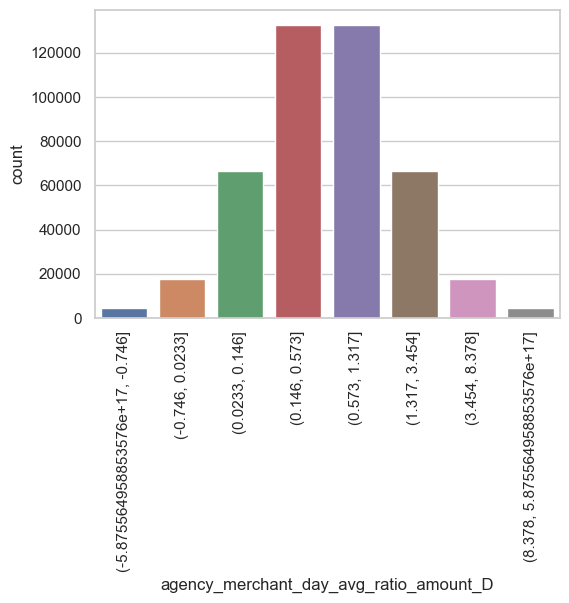

In [27]:
# Histogram for comparing ratio of amount spending and avergae spending by merchant category and day of week 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_day_avg_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is quite similar to the one (mean) that grouped by merchant category and month.
- Similarly, from the above distribution histogram, we can see that some transactions can be more than 3 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 2% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.
- Lastly, there are some transactions with negavtive amount, and their absolute amount can be more than 5 times of the average. It can be normal returns or refunds from vendors. However, it can also be alerts for Anti Money Laundering (AML) purpose of financing companies.

In [28]:
df3[df3['agency_merchant_day_avg_ratio_amount']>3].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_day_avg_ratio_amount,agency_merchant_day_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,164.736967,14.720436,"(8.378, 5.875564958853576e+17]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,164.736967,14.720436,"(8.378, 5.875564958853576e+17]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,430.365481,8.323158,"(3.454, 8.378]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,423.237493,3.100387,"(1.317, 3.454]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,457.158513,8.388775,"(8.378, 5.875564958853576e+17]"


In [29]:
df3[df3['agency_merchant_day_avg_ratio_amount']<-5].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_day_avg_ratio_amount,agency_merchant_day_avg_ratio_amount_D
356,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,-2474.99,CDW GOVERNMENT,2013-07-26,2013-07-29,CATALOG MERCHANTS,2013,7,30,Friday,480.646913,-5.149289,"(-5.875564958853576e+17, -0.746]"
1049,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Bowers,R,GENERAL PURCHASE,-638.82,LOWES #00241,2013-07-26,2013-07-29,HOME SUPPLY WAREHOUSE STORES,2013,7,30,Friday,89.286072,-7.154755,"(-5.875564958853576e+17, -0.746]"
1374,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,KELOUGH,N,GENERAL PURCHASE,-1812.78,LOCKE SUPPLY OKMULGEE,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,164.736967,-11.004088,"(-5.875564958853576e+17, -0.746]"
3080,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Oliver,S,GENERAL PURCHASE,319.30,BED BATH & BEYOND #651,2013-07-09,2013-07-10,MISCELLANEOUS HOME FURNISHING SPECIALTY STORES,2013,7,28,Tuesday,-1.104167,-289.177358,"(-5.875564958853576e+17, -0.746]"
3294,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Newman,B,GENERAL PURCHASE,-802.00,MATTHEWS OSU-COM,2013-07-03,2013-07-04,BOOK STORES,2013,7,27,Wednesday,127.948100,-6.268167,"(-5.875564958853576e+17, -0.746]"


####  3.2.2 Feature 4: The ratio to median amount (grouping by agency, merchant category and day of week) <a class="anchor" id="322"></a>
The median spending amount is used as benchmark for anomaly detection.

In [30]:
# create median spending group by agency, merchant category and day of week
stat4 = df.groupby(['Agency_Name', 'Merchant_Category','Day_of_Week'])['Amount'].median()
stat4 = pd.DataFrame(stat4)
stat4.columns = ['Median_amount']
stat4

Median_amount
Agency_Name                     Merchant_Category                          Day_of_Week               
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED Friday              115.12
                                CATALOG MERCHANTS                          Friday               31.33
                                                                           Monday              334.54
                                                                           Thursday           -334.54
                                                                           Wednesday            38.16
...                                                                                               ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            Thursday            272.80
                                                                           Tuesday            -283.50
                                                                           Wednesday           352.80
                                WYNDHAM HOTELS                             Thursday             87.00
                                                                           Tuesday             304.98

[27574 rows x 1 columns]

In [31]:
# add the new feature average spending to the dataset 
df4 = pd.merge(df, stat4, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 4: ratio of amount spending and median spending by merchant category and day of week 
df4['agency_merchant_day_median_ratio_amount'] = np.where(df4['Median_amount']==0,0, df4['Amount'] / df4['Median_amount'])
df4['agency_merchant_day_median_ratio_amount'].describe()

count    442458.000000
mean          5.234871
std        1269.794267
min      -10476.000000
25%           0.492068
50%           1.000000
75%           1.978509
max      608261.460064
Name: agency_merchant_day_median_ratio_amount, dtype: float64

To better look at the distribution of transactions' ratios of amount spending and median spending by merchant category and day of week, I cut them into different groups by percentile, and then use a histogram to visualize the distribution.

In [32]:
# cut by percentile for plotting
var = 'agency_merchant_day_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)
df4[['agency_merchant_day_median_ratio_amount']]

,agency_merchant_day_median_ratio_amount
0,2.976589
1,1.000000
2,1.131259
3,3.213000
4,1.183946
...,...
442453,4.560920
442454,4.608779
442455,0.320744
442456,55.045451


[Text(0, 0, '(-10476.001, -1.14]'),
 Text(1, 0, '(-1.14, 0.0686]'),
 Text(2, 0, '(0.0686, 0.38]'),
 Text(3, 0, '(0.38, 1.0]'),
 Text(4, 0, '(1.0, 2.507]'),
 Text(5, 0, '(2.507, 8.871]'),
 Text(6, 0, '(8.871, 27.35]'),
 Text(7, 0, '(27.35, 608261.46]')]

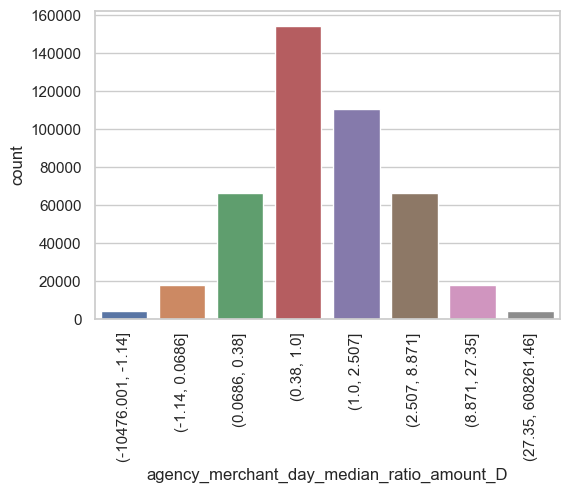

In [33]:
# Histogram for comparing ratio of amount spending and median spending by merchant category and day of week 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_day_median_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is also quite similar to the one (median) that grouped by merchant category and month. It indicates that for aggregation by merchant category in certain period of time, different time horizons can generate similar distributions for the ratios of amount spending and median/average spending by merchant category and day of week. We can pick either one (month/day of week) for preliminary fraud detection to improve efficiency.
- From the above distribution histogram, we can see that some transactions can be more than 8 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [34]:
df4[df4['agency_merchant_day_median_ratio_amount']>8].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_day_median_ratio_amount,agency_merchant_day_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,49.18,49.308662,"(27.35, 608261.46]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,49.18,49.308662,"(27.35, 608261.46]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,159.69,22.430960,"(8.871, 27.35]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,150.00,8.748000,"(2.507, 8.871]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,230.00,16.673913,"(8.871, 27.35]"


Afterwards, I will repeat the same process creating the following features. Therefore, the notes for code would be simplified. 

###  3.3 Grouping by agency, description and month <a class="anchor" id="33"></a>
The third aggregation method is to investigate the consumer spending pattern in the same use/transaction type (description), and within the same month. It is expected that people within the same organization should spend a certain range of amount in the same use, and within the same month. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.3.1 Feature 5: The ratio to average amount (grouping by agency, description and month) <a class="anchor" id="331"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-2.527152709652447e+16, -0.407]'),
 Text(1, 0, '(-0.407, 0.0169]'),
 Text(2, 0, '(0.0169, 0.112]'),
 Text(3, 0, '(0.112, 0.842]'),
 Text(4, 0, '(0.842, 1.019]'),
 Text(5, 0, '(1.019, 3.0]'),
 Text(6, 0, '(3.0, 8.468]'),
 Text(7, 0, '(8.468, 2.488309162866377e+16]')]

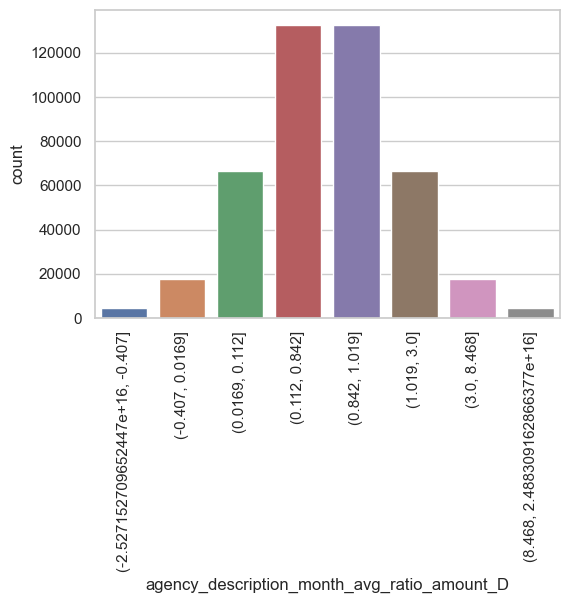

In [35]:
# create average spending group by agency, description and month
stat5 = df.groupby(['Agency_Name', 'Description','Month'])['Amount'].mean()
stat5 = pd.DataFrame(stat5)
stat5.columns = ['AVG_amount']
stat5
# add the new feature average spending to the dataset 
df5 = pd.merge(df, stat5, how='left', on=['Agency_Name', 'Description', 'Month'])
# Feature 5: ratio of amount spending and avergae spending by description and month 
df5['agency_description_month_avg_ratio_amount'] = np.where(df5['AVG_amount']==0,0, df5['Amount'] / df5['AVG_amount'])
df5['agency_description_month_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_description_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
df5[['agency_description_month_avg_ratio_amount']]
# Histogram for comparing ratio of amount spending and avergae spending by description and month 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_description_month_avg_ratio_amount_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is also quite similar to the ones (both mean and median) that grouped by merchant category and month/day of week.
- Similarly, from the above distribution histogram, we can see that some transactions can be more than 3 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same description within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 2% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.
- Lastly, there are some transactions with negavtive amount, and their absolute amount can be more than 2 times of the average. It can be normal returns or refunds from vendors. However, it can also be alerts for Anti Money Laundering (AML) purpose of financing companies.

In [36]:
df5[df5['agency_description_month_avg_ratio_amount']>3].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_description_month_avg_ratio_amount,agency_description_month_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,322.978388,7.508242,"(3.0, 8.468]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,322.978388,7.508242,"(3.0, 8.468]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,322.978388,11.090525,"(8.468, 2.488309162866377e+16]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,322.978388,4.062811,"(3.0, 8.468]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,322.978388,11.873860,"(8.468, 2.488309162866377e+16]"


In [37]:
df5[df5['agency_description_month_avg_ratio_amount']<-2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_description_month_avg_ratio_amount,agency_description_month_avg_ratio_amount_D
1217,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Cawood,D,GENERAL PURCHASE,-685.00,NTL COUNCL OF UNIV RSRCH,2013-07-26,2013-07-29,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,30,Friday,322.978388,-2.120885,"(-2.527152709652447e+16, -0.407]"
1374,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,KELOUGH,N,GENERAL PURCHASE,-1812.78,LOCKE SUPPLY OKMULGEE,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,322.978388,-5.612698,"(-2.527152709652447e+16, -0.407]"
1510,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Tornakian,M,JANITORIAL SUPPLIES NMB,-875.84,"GRIMSLEY'S, INC.",2013-07-02,2013-07-04,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,27,Tuesday,323.860548,-2.704374,"(-2.527152709652447e+16, -0.407]"
3294,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Newman,B,GENERAL PURCHASE,-802.00,MATTHEWS OSU-COM,2013-07-03,2013-07-04,BOOK STORES,2013,7,27,Wednesday,322.978388,-2.483138,"(-2.527152709652447e+16, -0.407]"
3701,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Golliver,J,GENERAL PURCHASE,-856.85,MARRIOTT 33716 NEW ORLEAN,2013-07-04,2013-07-05,MARRIOTT,2013,7,27,Thursday,322.978388,-2.652964,"(-2.527152709652447e+16, -0.407]"


####  3.3.2 Feature 6: The ratio to median amount (grouping by agency, description and month) <a class="anchor" id="332"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-885.543, -1.071]'),
 Text(1, 0, '(-1.071, 0.0554]'),
 Text(2, 0, '(0.0554, 0.402]'),
 Text(3, 0, '(0.402, 1.0]'),
 Text(4, 0, '(1.0, 2.246]'),
 Text(5, 0, '(2.246, 10.05]'),
 Text(6, 0, '(10.05, 33.937]'),
 Text(7, 0, '(33.937, 19230.893]')]

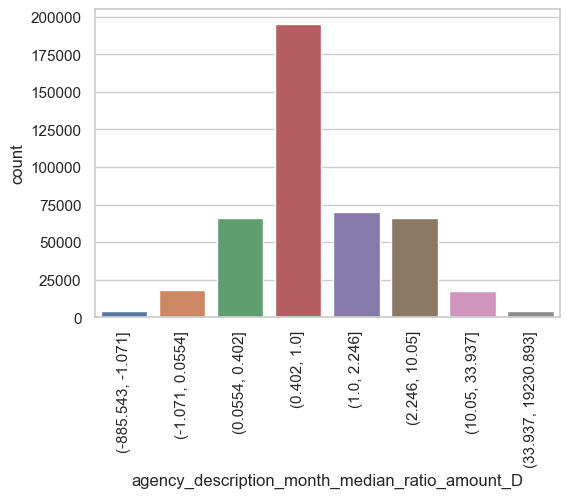

In [38]:
# create median spending group by agency, description and month
stat6 = df.groupby(['Agency_Name', 'Description','Month'])['Amount'].median()
stat6 = pd.DataFrame(stat6)
stat6.columns = ['Median_amount']
stat6
# add the new feature to the dataset 
df6 = pd.merge(df, stat6, how='left', on=['Agency_Name', 'Description', 'Month'])
# Feature 6: ratio of amount spending and median spending by Description and month 
df6['agency_description_month_median_ratio_amount'] = np.where(df6['Median_amount']==0,0, df6['Amount'] / df6['Median_amount'])
df6['agency_description_month_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_description_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)
df6[['agency_description_month_median_ratio_amount']]
# Histogram for comparing ratio of amount spending and median spending by merchant category and month 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_description_month_median_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is also quite similar to the ones (both mean and median) that grouped by merchant category and month/day of week. It indicates that merchant category and use/transaction type (description) might have strong correlations between each other, which makes them to generate similar distributions for the ratios. However, we can further use these two groups of conditions as mutual confirmations for anomaly detection. If there's a transaction that appears to be both anomaly in both groups, then it can be higher suspicious.
- From the above distribution histogram, we can see that some transactions can be more than 10 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same description within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [39]:
df6[df6['agency_description_month_median_ratio_amount']>10].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_description_month_median_ratio_amount,agency_description_month_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,110.0,22.045455,"(10.05, 33.937]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,110.0,22.045455,"(10.05, 33.937]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,110.0,32.563636,"(10.05, 33.937]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,110.0,11.929091,"(10.05, 33.937]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,110.0,34.863636,"(33.937, 19230.893]"


###  3.4 Grouping by agency, description and day of week <a class="anchor" id="34"></a>
The forth aggregation method is to investigate the consumer spending pattern in the same use/transaction type (description), and within the same day of week. It is expected that people within the same organization should spend a certain range of amount in the same use, and within the same day of week. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.4.1 Feature 7: The ratio to average amount (grouping by agency, description and day of week ) <a class="anchor" id="341"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-718.2139999999999, -0.409]'),
 Text(1, 0, '(-0.409, 0.0176]'),
 Text(2, 0, '(0.0176, 0.111]'),
 Text(3, 0, '(0.111, 0.819]'),
 Text(4, 0, '(0.819, 1.023]'),
 Text(5, 0, '(1.023, 2.937]'),
 Text(6, 0, '(2.937, 8.422]'),
 Text(7, 0, '(8.422, 2682.359]')]

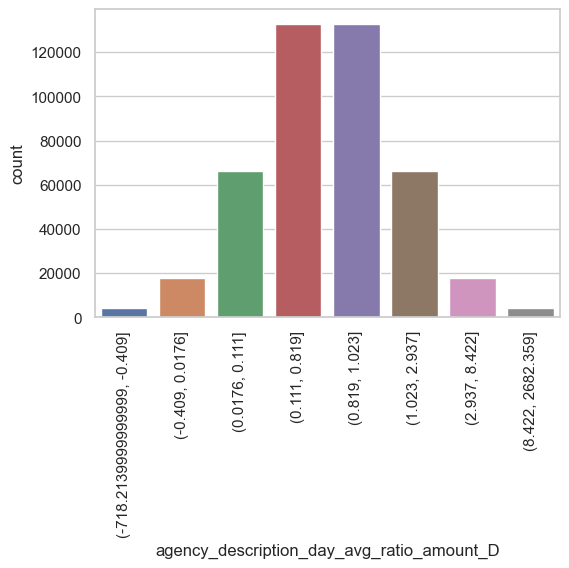

In [40]:
# create average spending group 
stat7 = df.groupby(['Agency_Name', 'Description','Day_of_Week'])['Amount'].mean()
stat7 = pd.DataFrame(stat7)
stat7.columns = ['AVG_amount']
stat1
# add the new feature to the dataset 
df7 = pd.merge(df, stat7, how='left', on=['Agency_Name', 'Description', 'Day_of_Week'])
# Feature 7
df7['agency_description_day_avg_ratio_amount'] = np.where(df7['AVG_amount']==0,0, df7['Amount'] / df7['AVG_amount'])
df7['agency_description_day_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_description_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
df7[['agency_description_day_avg_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_description_day_avg_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is quite similar to the one (mean) that grouped by description and month.
- Similarly, from the above distribution histogram, we can see that some transactions can be more than 8 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same description within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 2% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.
- Lastly, there are some transactions with negavtive amount, and their absolute amount can be more than 5 times of the average. It can be normal returns or refunds from vendors. However, it can also be alerts for Anti Money Laundering (AML) purpose of financing companies.

In [41]:
df7[df7['agency_description_day_avg_ratio_amount']>3].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_description_day_avg_ratio_amount,agency_description_day_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,308.624047,7.857456,"(2.937, 8.422]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,308.624047,7.857456,"(2.937, 8.422]"
29,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gann,D,CYLCARBONDIOXIDEIND200CGA3 MO|CYLCARBONDIOXIDE...,112.8,AIRGAS CENTRAL,2013-07-26,2013-07-29,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Friday,21.844444,5.163784,"(2.937, 8.422]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,323.835567,11.061169,"(8.422, 2682.359]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,325.872932,4.026723,"(2.937, 8.422]"


####  3.4.2 Feature 8: The ratio to median amount (grouping by agency, description and day of week) <a class="anchor" id="342"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-643.64, -1.08]'),
 Text(1, 0, '(-1.08, 0.055]'),
 Text(2, 0, '(0.055, 0.402]'),
 Text(3, 0, '(0.402, 1.0]'),
 Text(4, 0, '(1.0, 2.26]'),
 Text(5, 0, '(2.26, 10.0]'),
 Text(6, 0, '(10.0, 33.477]'),
 Text(7, 0, '(33.477, 17517.814]')]

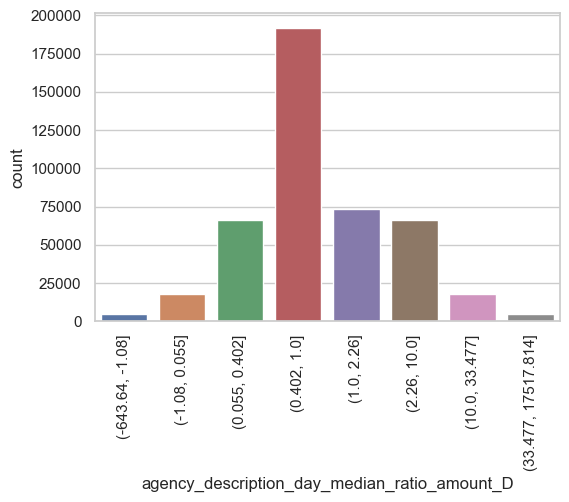

In [42]:
# create median spending group 
stat8 = df.groupby(['Agency_Name', 'Description','Day_of_Week'])['Amount'].median()
stat8 = pd.DataFrame(stat8)
stat8.columns = ['Median_amount']
stat8
# add the new feature to the dataset 
df8 = pd.merge(df, stat8, how='left', on=['Agency_Name', 'Description', 'Day_of_Week'])
# Feature 8
df8['agency_description_day_median_ratio_amount'] = np.where(df8['Median_amount']==0,0, df8['Amount'] / df8['Median_amount'])
df8['agency_description_day_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_description_day_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
df8[['agency_description_day_median_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_description_day_median_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is also quite similar to the one (median) that grouped by description and month. It indicates that for aggregation by description in certain period of time, different time horizons can generate similar distributions for the ratios of amount spending and median/average spending by description and day of week. We can pick either one (month/day of week) for preliminary fraud detection to improve efficiency.
- From the above distribution histogram, we can see that some transactions can be more than 10 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same description within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [43]:
df8[df8['agency_description_day_median_ratio_amount']>10].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_description_day_median_ratio_amount,agency_description_day_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,102.675,23.618213,"(10.0, 33.477]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,102.675,23.618213,"(10.0, 33.477]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,108.970,32.871433,"(10.0, 33.477]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,109.130,12.024191,"(10.0, 33.477]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,113.560,33.770694,"(33.477, 17517.814]"


###  3.5 Grouping by agency, vendor and month <a class="anchor" id="35"></a>
The fifth aggregation method is to investigate the consumer spending pattern in the same vendor, and within the same month. It is expected that people within the same organization should spend a certain range of amount in the same vendor, and within the same month. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.5.1 Feature 9: The ratio to average amount (grouping by agency, vendor and month) <a class="anchor" id="351"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-1.2668256604282766e+17, -0.449]'),
 Text(1, 0, '(-0.449, 0.0559]'),
 Text(2, 0, '(0.0559, 0.337]'),
 Text(3, 0, '(0.337, 1.0]'),
 Text(4, 0, '(1.0, 1.121]'),
 Text(5, 0, '(1.121, 2.513]'),
 Text(6, 0, '(2.513, 5.36]'),
 Text(7, 0, '(5.36, 1.2631932489255451e+17]')]

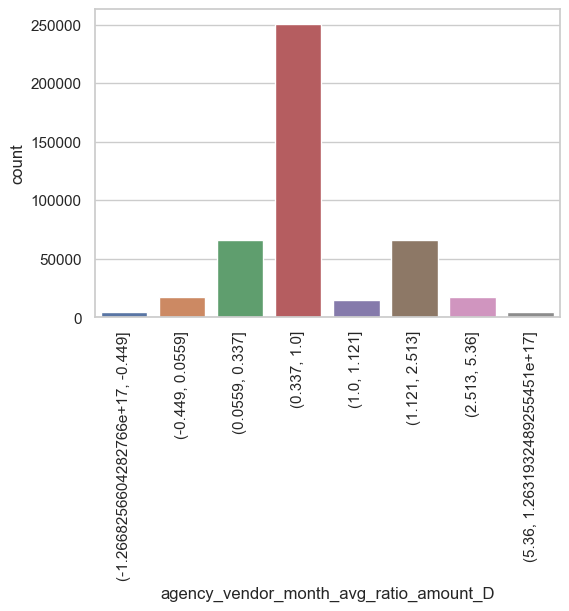

In [44]:
# create average spending group 
stat9 = df.groupby(['Agency_Name', 'Vendor','Month'])['Amount'].mean()
stat9 = pd.DataFrame(stat9)
stat9.columns = ['AVG_amount']
stat9
# add the new feature to the dataset 
df9 = pd.merge(df, stat9, how='left', on=['Agency_Name', 'Vendor', 'Month'])
# Feature 9
df9['agency_vendor_month_avg_ratio_amount'] = np.where(df9['AVG_amount']==0,0, df9['Amount'] / df9['AVG_amount'])
df9['agency_vendor_month_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_vendor_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
df9[['agency_vendor_month_avg_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_vendor_month_avg_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is highly concentrated around mean, and the deviation is smaller compared to the other features' distributions. It could be caused by the wider choice of vendors than the other categories (eg. description and merchant category), or people spend more evenly among vendors. 
- However, we can still see that some transactions can be more than 2.5 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same vendor within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [45]:
df9[df9['agency_vendor_month_avg_ratio_amount']>2.5].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_avg_ratio_amount_D
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,237.945701,3.004635,"(2.513, 5.36]"
54,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,M,GENERAL PURCHASE,159.97,GARMIN INTERNATIONAL,2013-07-24,2013-07-26,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,30,Wednesday,48.520000,3.296991,"(2.513, 5.36]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,461.461429,5.173152,"(2.513, 5.36]"
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,691.547143,2.810061,"(2.513, 5.36]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,48.712222,4.105540,"(2.513, 5.36]"


####  3.5.2 Feature 10: The ratio to median amount (grouping by agency, vendor and month) <a class="anchor" id="352"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-2087.3340000000003, -0.81]'),
 Text(1, 0, '(-0.81, 0.121]'),
 Text(2, 0, '(0.121, 0.632]'),
 Text(3, 0, '(0.632, 1.0]'),
 Text(4, 0, '(1.0, 1.449]'),
 Text(5, 0, '(1.449, 4.829]'),
 Text(6, 0, '(4.829, 15.044]'),
 Text(7, 0, '(15.044, 63226.0]')]

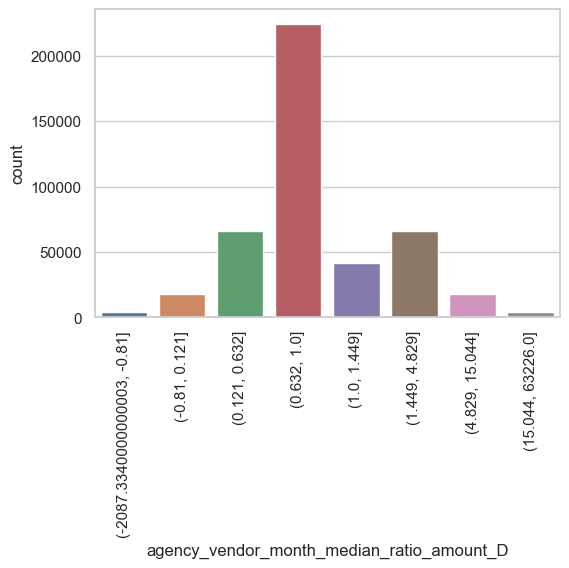

In [46]:
# create median spending group by agency, vendor and month
stat10 = df.groupby(['Agency_Name', 'Vendor','Month'])['Amount'].median()
stat10 = pd.DataFrame(stat10)
stat10.columns = ['Median_amount']
stat10
# add the new feature average spending to the dataset 
df10 = pd.merge(df, stat10, how='left', on=['Agency_Name', 'Vendor', 'Month'])
# Feature 10
df10['agency_vendor_month_median_ratio_amount'] = np.where(df10['Median_amount']==0,0, df10['Amount'] / df10['Median_amount'])
df10['agency_vendor_month_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_vendor_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['agency_vendor_month_median_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_vendor_month_median_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is highly concentrated around mean, and the deviation is smaller compared to the other features' distributions. It could be caused by the wider choice of vendors than the other categories (eg. description and merchant category), or people spend more evenly among vendors.
- However, we can still see that some transactions can be more than 6 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same vendor within same month. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 12% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [47]:
df10[df10['agency_vendor_month_median_ratio_amount']>5].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_vendor_month_median_ratio_amount,agency_vendor_month_median_ratio_amount_D
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,103.49,6.908300,"(4.829, 15.044]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,103.75,23.009253,"(15.044, 63226.0]"
78,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Fokar,M,QIAPREP SPIN MINIPREP KIT KIT|RNEASY MINI PLAN...,1943.29,QIAGEN INC,2013-07-26,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,367.47,5.288296,"(4.829, 15.044]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,19.99,10.004502,"(4.829, 15.044]"
100,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,HANNON,B,GENERAL PURCHASE,720.00,CITY GLASS,2013-07-25,2013-07-29,"GLASS,PAINT,AND WALLPAPER STORES",2013,7,30,Thursday,89.50,8.044693,"(4.829, 15.044]"


###  3.6 Grouping by agency, vendor and day of week <a class="anchor" id="36"></a>
The sixth aggregation method is to investigate the consumer spending pattern in the same vendor, and within the same day of week. It is expected that people within the same organization should spend a certain range of amount in the same vendor, and within the same day of week. This can be regulated by the corporation policy, or the usual business activities in the specific organization.

####  3.6.1 Feature 11: The ratio to average amount (grouping by agency, vendor and day of week) <a class="anchor" id="361"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-1.3795792296031026e+16, -0.4]'),
 Text(1, 0, '(-0.4, 0.0582]'),
 Text(2, 0, '(0.0582, 0.316]'),
 Text(3, 0, '(0.316, 1.0]'),
 Text(4, 0, '(1.0, 1.137]'),
 Text(5, 0, '(1.137, 2.56]'),
 Text(6, 0, '(2.56, 5.706]'),
 Text(7, 0, '(5.706, 1.1849392832076844e+16]')]

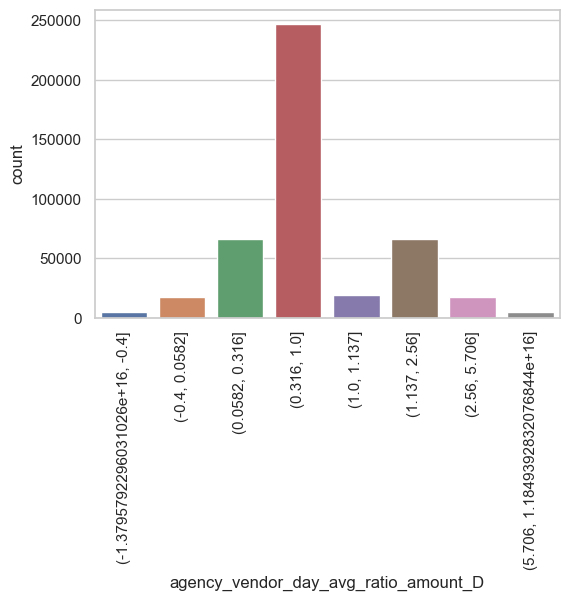

In [48]:
# create average spending group 
stat11 = df.groupby(['Agency_Name', 'Vendor','Day_of_Week'])['Amount'].mean()
stat11= pd.DataFrame(stat11)
stat11.columns = ['AVG_amount']
stat11
# add the new feature to the dataset 
df11 = pd.merge(df, stat11, how='left', on=['Agency_Name', 'Vendor', 'Day_of_Week'])
# Feature 11
df11['agency_vendor_day_avg_ratio_amount'] = np.where(df11['AVG_amount']==0,0, df11['Amount'] / df11['AVG_amount'])
df11['agency_vendor_day_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_vendor_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut(df11[var],percentile)
df11[['agency_vendor_day_avg_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_vendor_day_avg_ratio_amount_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is quite similar to the one (mean) that grouped by vendor and month.
- Similarly, from the above distribution histogram, we can see that some transactions can be more than 2.5 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same vendor within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 6% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [49]:
df11[df11['agency_vendor_day_avg_ratio_amount']>2.5].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_vendor_day_avg_ratio_amount,agency_vendor_day_avg_ratio_amount_D
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,464.985000,2.822027,"(2.56, 5.706]"
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,232.387296,3.076502,"(2.56, 5.706]"
59,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,545.40,ALLEGRA PRINT & IMAGING,2013-07-24,2013-07-26,QUICK-COPY AND REPRODUCTION SERVICES,2013,7,30,Wednesday,201.956818,2.700577,"(2.56, 5.706]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,477.291667,5.001575,"(2.56, 5.706]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,46.303500,4.319112,"(2.56, 5.706]"


####  3.6.2 Feature 12: The ratio to median amount (grouping by agency, vendor and day of week) <a class="anchor" id="362"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-35998.001, -0.714]'),
 Text(1, 0, '(-0.714, 0.129]'),
 Text(2, 0, '(0.129, 0.607]'),
 Text(3, 0, '(0.607, 1.0]'),
 Text(4, 0, '(1.0, 1.53]'),
 Text(5, 0, '(1.53, 5.121]'),
 Text(6, 0, '(5.121, 15.526]'),
 Text(7, 0, '(15.526, 63226.0]')]

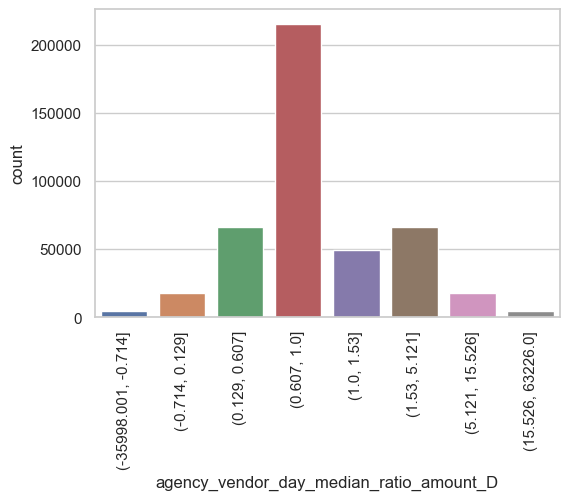

In [50]:
# create median spending group 
stat12 = df.groupby(['Agency_Name', 'Vendor','Day_of_Week'])['Amount'].median()
stat12 = pd.DataFrame(stat12)
stat12.columns = ['Median_amount']
stat12
# add the new feature to the dataset 
df12 = pd.merge(df, stat12, how='left', on=['Agency_Name', 'Vendor', 'Day_of_Week'])
# Feature 12
df12['agency_vendor_day_median_ratio_amount'] = np.where(df12['Median_amount']==0,0, df12['Amount'] / df12['Median_amount'])
df12['agency_vendor_day_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_vendor_day_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)
df12[['agency_vendor_day_median_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_vendor_day_median_ratio_amount_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- This distribution is also quite similar to the one (median) that grouped by vendor and month. It indicates that for aggregation by description in certain period of time, different time horizons can generate similar distributions for the ratios of amount spending and median/average spending by vendor and day of week. We can pick either one (month/day of week) for preliminary fraud detection to improve efficiency.
- From the above distribution histogram, we can see that some transactions can be more than 5 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same vendor within same day of week. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 13% of the median, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [51]:
df12[df12['agency_vendor_day_median_ratio_amount']>5].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_vendor_day_median_ratio_amount,agency_vendor_day_median_ratio_amount_D
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,111.280,6.424694,"(5.121, 15.526]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,164.345,14.525602,"(5.121, 15.526]"
80,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,64.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,9.990,6.505506,"(5.121, 15.526]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,9.990,20.019019,"(15.526, 63226.0]"
100,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,HANNON,B,GENERAL PURCHASE,720.00,CITY GLASS,2013-07-25,2013-07-29,"GLASS,PAINT,AND WALLPAPER STORES",2013,7,30,Thursday,89.500,8.044693,"(5.121, 15.526]"


###  3.7 Grouping by agency, merchant category and description  <a class="anchor" id="37"></a>
The seventh aggregation method is to investigate the consumer spending pattern in the same merchant category, and the same use/transcation type (description). 
- It is expected that people within the same organization should spend a certain range of amount in the same merchant category, and the same use/transcation type (description). This can be regulated by the corporation policy, or the usual business activities in the specific organization.
- Based on previous analysis, we can see that the feature distributions grouping by merchant category and description are similar to each other. We can also use them as a mutual confirmation of the detected anomalies. I think the aggregation grouping by both of them could be even a stronger feature than the single one of the them, because of the potential 'synergies'.

####  3.7.1 Feature 13: The ratio to average amount (grouping by agency, merchant category and description) <a class="anchor" id="371"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-6.275203130787365e+16, -0.679]'),
 Text(1, 0, '(-0.679, 0.0308]'),
 Text(2, 0, '(0.0308, 0.224]'),
 Text(3, 0, '(0.224, 0.925]'),
 Text(4, 0, '(0.925, 1.132]'),
 Text(5, 0, '(1.132, 2.786]'),
 Text(6, 0, '(2.786, 7.12]'),
 Text(7, 0, '(7.12, 6.275203130787365e+16]')]

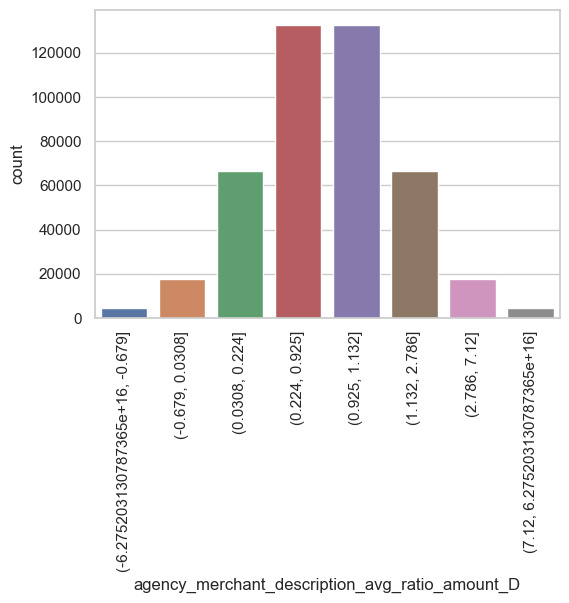

In [52]:
# create average spending group 
stat13 = df.groupby(['Agency_Name', 'Merchant_Category','Description'])['Amount'].mean()
stat13 = pd.DataFrame(stat13)
stat13.columns = ['AVG_amount']
stat13
# add the new feature to the dataset 
df13 = pd.merge(df, stat13, how='left', on=['Agency_Name', 'Merchant_Category','Description'])
# Feature 9
df13['agency_merchant_description_avg_ratio_amount'] = np.where(df13['AVG_amount']==0,0, df13['Amount'] / df13['AVG_amount'])
df13['agency_merchant_description_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_merchant_description_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut(df13[var],percentile)
df13[['agency_merchant_description_avg_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_description_avg_ratio_amount_D", data=df13)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the average, which is similar to feature distributions of the grouping by merchant category and description separately.  
- From the above distribution histogram, we can see that some transactions can be more than 2.8 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category and description. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 3% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [53]:
df13[df13['agency_merchant_description_avg_ratio_amount']>2.8].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_description_avg_ratio_amount,agency_merchant_description_avg_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,180.069042,13.467057,"(7.12, 6.275203130787365e+16]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.0,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,180.069042,13.467057,"(7.12, 6.275203130787365e+16]"
29,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gann,D,CYLCARBONDIOXIDEIND200CGA3 MO|CYLCARBONDIOXIDE...,112.8,AIRGAS CENTRAL,2013-07-26,2013-07-29,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Friday,19.519302,5.778895,"(2.786, 7.12]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,396.544623,9.033031,"(7.12, 6.275203130787365e+16]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,396.544623,3.309085,"(2.786, 7.12]"


####  3.7.2 Feature 14: The ratio to median amount (grouping by agency, merchant category and description) <a class="anchor" id="372"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-59114.001, -1.082]'),
 Text(1, 0, '(-1.082, 0.0916]'),
 Text(2, 0, '(0.0916, 0.536]'),
 Text(3, 0, '(0.536, 1.0]'),
 Text(4, 0, '(1.0, 1.778]'),
 Text(5, 0, '(1.778, 6.768]'),
 Text(6, 0, '(6.768, 22.617]'),
 Text(7, 0, '(22.617, 528116.053]')]

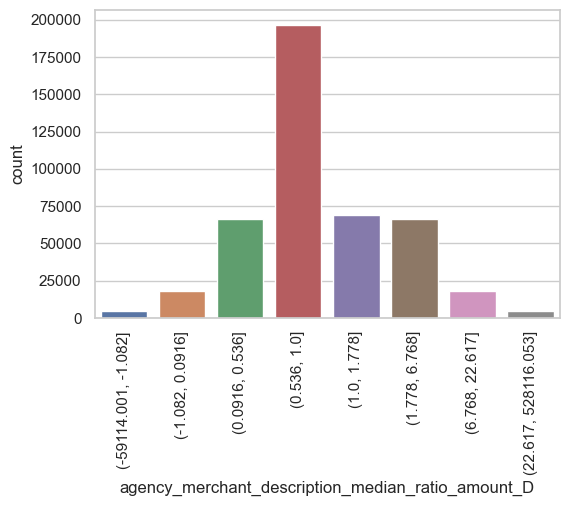

In [54]:
# create median spending group 
stat14 = df.groupby(['Agency_Name', 'Merchant_Category','Description'])['Amount'].median()
stat14 = pd.DataFrame(stat14)
stat14.columns = ['Median_amount']
stat14
# add the new feature to the dataset 
df14 = pd.merge(df, stat14, how='left', on=['Agency_Name', 'Merchant_Category','Description'])
# Feature 14
df14['agency_merchant_description_median_ratio_amount'] = np.where(df14['Median_amount']==0,0, df14['Amount'] / df14['Median_amount'])
df14['agency_merchant_description_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_merchant_description_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut(df14[var],percentile)
df14[['agency_merchant_description_median_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_description_median_ratio_amount_D", data=df14)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the median, which is similar to feature distributions of the grouping by merchant category and description separately.
- From the above distribution histogram, we can see that some transactions can be more than 6.7 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category and description. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 9% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [55]:
df14[df14['agency_merchant_description_median_ratio_amount']>6.7].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_description_median_ratio_amount,agency_merchant_description_median_ratio_amount_D
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,58.10,41.738382,"(22.617, 528116.053]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,58.10,41.738382,"(22.617, 528116.053]"
29,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gann,D,CYLCARBONDIOXIDEIND200CGA3 MO|CYLCARBONDIOXIDE...,112.80,AIRGAS CENTRAL,2013-07-26,2013-07-29,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CL...,2013,7,30,Friday,12.57,8.973747,"(6.768, 22.617]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,152.76,23.448547,"(22.617, 528116.053]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,58.10,7.019793,"(6.768, 22.617]"


###  3.8 Grouping by agency, merchant category and vendor<a class="anchor" id="38"></a>
The eighth aggregation method is to investigate the consumer spending pattern in the same merchant category, and the same vendor. 
- It is expected that people within the same organization should spend a certain range of amount in the same merchant category, and the same vendor. This can be regulated by the corporation policy, or the usual business activities in the specific organization.
- We can see that the feature distributions of the grouping by vendor is very different from the grouping by merchant category and description. We can combine merchant category and vendor to take more information into account. 

####  3.8.1 Feature 15: The ratio to average amount (grouping by agency, merchant category and vendor) <a class="anchor" id="381"></a>
The average spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-6.944550625405305e+16, -0.507]'),
 Text(1, 0, '(-0.507, 0.04]'),
 Text(2, 0, '(0.04, 0.255]'),
 Text(3, 0, '(0.255, 0.958]'),
 Text(4, 0, '(0.958, 1.22]'),
 Text(5, 0, '(1.22, 2.788]'),
 Text(6, 0, '(2.788, 6.116]'),
 Text(7, 0, '(6.116, 6.424384868444013e+16]')]

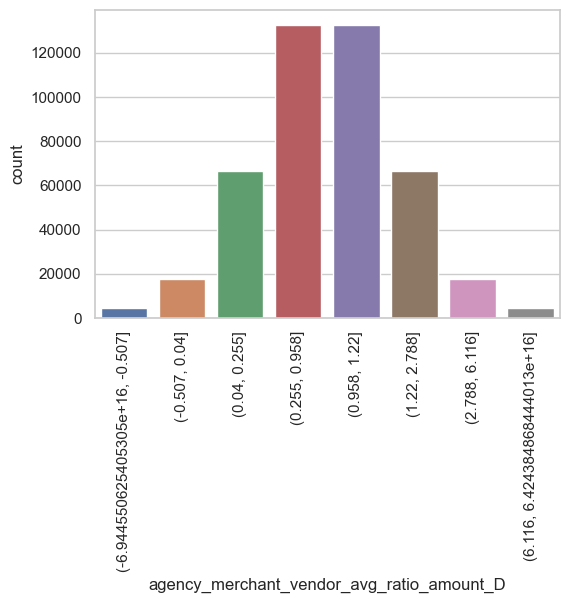

In [56]:
# create average spending group 
stat15 = df.groupby(['Agency_Name', 'Merchant_Category','Vendor'])['Amount'].mean()
stat15 = pd.DataFrame(stat15)
stat15.columns = ['AVG_amount']
stat15
# add the new feature to the dataset 
df15 = pd.merge(df, stat15, how='left', on=['Agency_Name', 'Merchant_Category','Vendor'])
# Feature 15
df15['agency_merchant_vendor_avg_ratio_amount'] = np.where(df15['AVG_amount']==0,0, df15['Amount'] / df15['AVG_amount'])
df15['agency_merchant_vendor_avg_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_merchant_vendor_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile)
df15[['agency_merchant_vendor_avg_ratio_amount']]
# Histogram
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_avg_ratio_amount_D", data=df15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the average, which is very similar to feature distributions of the grouping by merchant category. The effect of grouping transactions by merchant category seems more obvious than by vendor.
- From the above distribution histogram, we can see that some transactions can be more than 2.8 times of the average, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category and vendor. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 4% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [57]:
df15[df15['agency_merchant_vendor_avg_ratio_amount']>2.8].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_avg_ratio_amount_D
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.20,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,357.718261,3.668250,"(2.788, 6.116]"
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,240.132918,2.977268,"(2.788, 6.116]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,429.909032,5.552826,"(2.788, 6.116]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,31.674651,6.313882,"(6.116, 6.424384868444013e+16]"
100,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,HANNON,B,GENERAL PURCHASE,720.00,CITY GLASS,2013-07-25,2013-07-29,"GLASS,PAINT,AND WALLPAPER STORES",2013,7,30,Thursday,215.525000,3.340680,"(2.788, 6.116]"


####  3.8.2 Feature 16: The ratio to median amount (grouping by agency, merchant category and vendor) <a class="anchor" id="382"></a>
The median spending amount is used as benchmark for anomaly detection.

[Text(0, 0, '(-683.9209999999999, -0.995]'),
 Text(1, 0, '(-0.995, 0.0912]'),
 Text(2, 0, '(0.0912, 0.507]'),
 Text(3, 0, '(0.507, 1.0]'),
 Text(4, 0, '(1.0, 1.788]'),
 Text(5, 0, '(1.788, 5.776]'),
 Text(6, 0, '(5.776, 16.505]'),
 Text(7, 0, '(16.505, 13119.0]')]

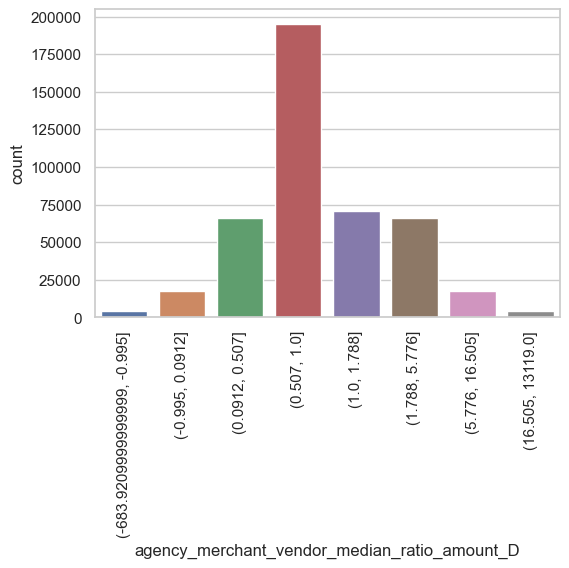

In [58]:
# create median spending group 
stat16 = df.groupby(['Agency_Name', 'Merchant_Category','Vendor'])['Amount'].median()
stat16 = pd.DataFrame(stat16)
stat16.columns = ['Median_amount']
stat16
# add the new feature to the dataset 
df16 = pd.merge(df, stat16, how='left', on=['Agency_Name', 'Merchant_Category','Vendor'])
# Feature 16
df16['agency_merchant_vendor_median_ratio_amount'] = np.where(df16['Median_amount']==0,0, df16['Amount'] / df16['Median_amount'])
df16['agency_merchant_vendor_median_ratio_amount'].describe()
# cut by percentile for plotting
var = 'agency_merchant_vendor_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df16[binned_var] = pd.qcut(df16[var],percentile)
df16[['agency_merchant_vendor_median_ratio_amount']]
# Histogram 
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_median_ratio_amount_D", data=df16)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- The distribution histogram shows most of the transactions' amounts are around the median, which is very similar to feature distributions of the grouping by merchant category. The effect of grouping transactions by merchant category seems more obvious than by vendor.
- From the above distribution histogram, we can see that some transactions can be more than 5.7 times of the median, and their frequencies are extremely low. Therefore, we should identify these transactions as extreme spendings compared to the same merchant category and vendor. The credit card company or agency should investigate in these transactions one by one, together with other information of each credit card holder and transaction.
- Some transactions can be less than 9% of the average, whose frequencies are extremely low as well. However, it's less likely that fraudsters would abuse the credit card with only very subtle amount, and this amount of loss can be less important than the larger ones. Therefore, the investigation's priority can be low. However, if the credit card companies want to motivate the card holders for more spendings, they can pick these transactions' card holders as their target customer. It provides convenience for marketing purpose of credit card companies.

In [59]:
df16[df16['agency_merchant_vendor_median_ratio_amount']>5.7].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_vendor_median_ratio_amount,agency_merchant_vendor_median_ratio_amount_D
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,25.99,6.380146,"(5.776, 16.505]"
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,108.07,6.615527,"(5.776, 16.505]"
69,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dzialowski,A,GENERAL PURCHASE,2387.21,CAROLINA BIOLOGICAL SPLY,2013-07-25,2013-07-26,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Thursday,135.25,17.650351,"(16.505, 13119.0]"
80,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,64.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,10.32,6.297481,"(5.776, 16.505]"
81,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foust,S,GENERAL PURCHASE,199.99,APL APPLE ITUNES STORE,2013-07-25,2013-07-26,RECORD STORES,2013,7,30,Thursday,10.32,19.378876,"(16.505, 13119.0]"


## Section 4 Conclusion <a class="anchor" id="4"></a>

###  4.1 Combine New Features to Dataset <a class="anchor" id="41"></a>

In [62]:
# Combine new features to the origininal dataset
df['agency_merchant_month_avg_ratio_amount'] = df1['agency_merchant_month_avg_ratio_amount']
df['agency_merchant_month_median_ratio_amount'] = df2['agency_merchant_month_median_ratio_amount']
df['agency_merchant_day_avg_ratio_amount'] = df3['agency_merchant_day_avg_ratio_amount']
df['agency_merchant_day_median_ratio_amount'] = df4['agency_merchant_day_median_ratio_amount']
df['agency_description_month_avg_ratio_amount'] = df5['agency_description_month_avg_ratio_amount']
df['agency_description_month_median_ratio_amount'] = df6['agency_description_month_median_ratio_amount']
df['agency_description_day_avg_ratio_amount'] = df7['agency_description_day_avg_ratio_amount']
df['agency_description_day_median_ratio_amount'] = df8['agency_description_day_median_ratio_amount']
df['agency_vendor_month_avg_ratio_amount'] = df9['agency_vendor_month_avg_ratio_amount']
df['agency_vendor_month_median_ratio_amount'] = df10['agency_vendor_month_median_ratio_amount']
df['agency_vendor_day_avg_ratio_amount'] = df11['agency_vendor_day_avg_ratio_amount']
df['agency_vendor_day_median_ratio_amount'] = df12['agency_vendor_day_median_ratio_amount']
df['agency_merchant_description_avg_ratio_amount'] = df13['agency_merchant_description_avg_ratio_amount']
df['agency_merchant_description_median_ratio_amount'] = df14['agency_merchant_description_median_ratio_amount']
df['agency_merchant_vendor_avg_ratio_amount'] = df15['agency_merchant_vendor_avg_ratio_amount']
df['agency_merchant_vendor_median_ratio_amount'] = df16['agency_merchant_vendor_median_ratio_amount']
df.head()
df.to_csv('credit_card_fe.csv', index=False)

The newly created features' have been added into the dataset and their statistics are shown below, which is ready for further building credit card fraud detection models. 

In [61]:
# check dimensions of the dataset, we found it has 442,458 rows and 31 columns now 
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(442458, 31)
Index(['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
       'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor',
       'Transaction_Date', 'Posted_Date', 'Merchant_Category', 'Year', 'Month',
       'Week_Number', 'Day_of_Week', 'agency_merchant_month_avg_ratio_amount',
       'agency_merchant_month_median_ratio_amount',
       'agency_merchant_day_avg_ratio_amount',
       'agency_merchant_day_median_ratio_amount',
       'agency_description_month_avg_ratio_amount',
       'agency_description_month_median_ratio_amount',
       'agency_description_day_avg_ratio_amount',
       'agency_description_day_median_ratio_amount',
       'agency_vendor_month_avg_ratio_amount',
       'agency_vendor_month_median_ratio_amount',
       'agency_vendor_day_avg_ratio_amount',
       'agency_vendor_day_median_ratio_amount',
       'agency_merchant_description_avg_ratio_amount',
       'agency_merchant_description_median_ratio_amount',
       'agency_merc

,Agency_Number,Amount,Year,Month,Week_Number,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_merchant_day_median_ratio_amount,agency_description_month_avg_ratio_amount,...,agency_description_day_avg_ratio_amount,agency_description_day_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_vendor_day_median_ratio_amount,agency_merchant_description_avg_ratio_amount,agency_merchant_description_median_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount
count,442458.000000,4.424580e+05,442458.000000,442458.000000,442458.0,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,...,442458.000000,442458.000000,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,442458.000000,4.424580e+05,442458.000000
mean,42785.860353,4.249912e+02,2013.509058,6.378526,25.94152,9.993083e-01,5.010047,9.986634e-01,5.234871,9.991991e-01,...,0.999595,2.872417,9.945976e-01,1.798033,9.966506e-01,1.802232,9.983323e-01,4.400840,9.930760e-01,1.826771
std,33378.461293,5.266509e+03,0.499919,3.359571,14.526169,5.961952e+13,1195.766096,3.091416e+15,1269.794267,5.332115e+13,...,6.555628,39.239700,3.650538e+14,98.046931,2.749640e+13,123.273764,1.830668e+14,1085.946374,1.963144e+14,21.214185
min,1000.000000,-4.286304e+04,2013.000000,1.000000,1.0,-2.447706e+16,-29642.000000,-5.875565e+17,-10476.000000,-2.527153e+16,...,-718.213058,-643.639167,-1.266826e+17,-2087.333333,-1.379579e+16,-35998.000000,-6.275203e+16,-59114.000000,-6.944551e+16,-683.920000
25%,1000.000000,3.091000e+01,2013.000000,3.000000,13.0,2.017647e-01,0.500000,1.938586e-01,0.492068,1.707372e-01,...,0.169800,0.567547,4.630255e-01,0.822357,4.289256e-01,0.783615,3.190346e-01,0.695842,3.414728e-01,0.660413
50%,47700.000000,1.048900e+02,2014.000000,6.000000,26.0,5.984763e-01,1.000000,5.725592e-01,1.000000,8.420009e-01,...,0.819203,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,9.253086e-01,1.000000,9.576271e-01,1.000000
75%,76000.000000,3.450000e+02,2014.000000,9.000000,38.0,1.125213e+00,1.912717,1.115607e+00,1.978509,1.000000e+00,...,1.000000,1.673602,1.000000e+00,1.166989,1.000000e+00,1.234054,1.000000e+00,1.412328,1.038744e+00,1.442708
max,98000.000000,1.903858e+06,2014.000000,12.000000,52.0,3.059633e+16,598420.505983,5.875565e+17,608261.460064,2.488309e+16,...,2682.359399,17517.814051,1.263193e+17,63226.000000,1.184939e+16,63226.000000,6.275203e+16,528116.052705,6.424385e+16,13119.000000


###  4.2 Future Improvements <a class="anchor" id="42"></a>
- Other than the amount spent on the transactions, we can also calculate the total number of transactions during feature engineering. 
- There are more groups to be explored for transaction aggregation (eg. grouping by agency + merchant category + vendor + month). 
- Functions can be created for duplicated process of feature creation to improve the efficiency.